In [68]:
import pandas as pd
import mdtraj as md
import numpy as np
from numpy.random import seed
from numpy.random import shuffle
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from __future__ import print_function
import seaborn as sns
from matplotlib.ticker import NullFormatter, MaxNLocator
import matplotlib.ticker as ticker
import plotly.graph_objects as go
import scipy as sp
from itertools import chain
import matplotlib as mpl
from matplotlib.lines import Line2D
from scipy import spatial
from scipy.spatial import ConvexHull
from scipy.optimize import curve_fit
import scipy.stats as stats
import statsmodels.stats.weightstats
from matplotlib import path
import matplotlib
from scipy.stats import probplot,shapiro, sem
import statsmodels.api as sm
from scipy.interpolate import make_interp_spline
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from matplotlib import cm
from numpy import linspace
import umap.umap_ as umap
#import pylab
import os
#import PIL
#from scipy.ndimage import gaussian_filter, uniform_filter1d

# Some Functions

In [2]:
def protein_3dplot_against_GW(protein_var,protein_label,second_obj,provided_color):
    
    x_variable= r'$R_g\left/R_g^{theta}\right.$' 
    y_variable=r'$R_s$'
    global grid_protein, grid_GW

    testeq_GW= pd.read_csv('../segmented_chain_project/reference_GW_chainlen_100_for_RSA.csv')
    
    plt.rcParams["font.weight"] = "regular"
    plt.rcParams["axes.labelweight"] = "regular"
    
    
    x_polmodel_GW=[]
    y_polmodel_GW=[]
    x_total=[]
    y_total=[]

    scatter_markers=['d','x',4,'o','v','^','1','8','s','p','P','*','X','D',9]

    GW_rg = testeq_GW['Rg2']**0.5
    GW_rg_mean = GW_rg.mean()
    GW_rg_by_rg_mean = GW_rg/GW_rg_mean
    testeq_GW['Rg/Rg_mean'] = GW_rg_by_rg_mean
    
    x_polmodel_GW.append(GW_rg_by_rg_mean)
    y_polmodel_GW.append(testeq_GW['ratio'].values)
    
    if second_obj=='protein':        
        temp_protein =  protein_var.copy()

        x_total.append(temp_protein['Rg/Rg_theta'].values)
        y_total.append(temp_protein.ratio.values)

        # fC_value=RSA_based_fC(temp_protein,
        #                protein_label,
        #                second_obj,testeq_GW,
        #                temp_protein.shape[0],
        #                1,0.1)            
        del temp_protein
    else:
        print('ERROR. FIX ERROR')

    x_total=list(chain.from_iterable(x_total))
    y_total=list(chain.from_iterable(y_total))
    x_polmodel_GW=list(chain.from_iterable(x_polmodel_GW))
    y_polmodel_GW=list(chain.from_iterable(y_polmodel_GW))

    # Set up default x and y limits
    max_x_val=3
    max_y_val=30
    xlims = [0,max_x_val]
    ylims = [0,max_y_val]
    if testeq_GW['Rg/Rg_mean'].max()>max_x_val or testeq_GW['Rg/Rg_mean'].min()<0:
        return print('ERROR')
    elif max(x_total)>max_x_val or min(x_total)<0:
        return print('ERROR')        
    elif testeq_GW['ratio'].max()>max_y_val or testeq_GW['ratio'].min()<0:
        return print('ERROR')
    elif max(y_total)>max_y_val or min(y_total)<0:
        return print('ERROR')        

    # Set up your x and y labels
    xlabel = x_variable
    ylabel = y_variable

    # Define the locations for the axes

    left, width = 0.12, 0.55
    bottom, height = 0.12, 0.55
    bottom_h = left_h = left+width
    rect_temperature = [left, bottom, width, height] # dimensions of temp plot
    rect_histx = [left, bottom_h, width, 0.25] # dimensions of x-histogram
    rect_histy = [left_h, bottom, 0.25, height] # dimensions of y-histogram


    # Set up the size of the figure
    fig = plt.figure(1, figsize=(5.2,5))

    # Make the three plots
    axTemperature = plt.axes(rect_temperature) # temperature plot
    axHistx = plt.axes(rect_histx) # x histogram
    axHisty = plt.axes(rect_histy) # y histogram


    axHistx.axes.get_xaxis().set_visible(False)
    axHisty.axes.get_yaxis().set_visible(False)


    # Find the min/max of the data
    xmin = min(xlims)
    xmax = max(xlims)
    ymin = min(ylims)
    ymax = max(ylims)

    # Remove the inner axes numbers of the histograms
    nullfmt = NullFormatter()
    #
    # Define the number of bins
    nxbins = 100
    nybins = 50
    nbins = nxbins+nybins

    xbins = linspace(start = xmin, stop = xmax, num = nxbins)
    ybins = linspace(start = ymin, stop = ymax, num = nybins)
    xcenter = (xbins[0:-1]+xbins[1:])/2.0
    ycenter = (ybins[0:-1]+ybins[1:])/2.0
    aspectratio = (1.0*(xmax - 0))/(1.38*ymax - 0)


    X = xcenter
    Y = ycenter

    axTemperature.scatter(x_polmodel_GW,y_polmodel_GW,
                      marker=scatter_markers[3],s=1,alpha=0.6,color='black',
                       label='GW')
    
    axTemperature.scatter(x_total,
               y_total,
               marker=scatter_markers[0],s=1,alpha=0.6,color=provided_color,
                                      label=protein_label)                



    #Plot the axes labels
    axTemperature.set_xlabel(xlabel,fontsize=12,labelpad = 1)
    axTemperature.set_ylabel(ylabel,fontsize=12, labelpad = 1)

    #Set up the plot limits
    axTemperature.set_xlim(xlims)
    axTemperature.set_ylim(ylims)

    #Set up the histogram bins
    xbins = np.arange(xmin, xmax, (xmax-xmin)/nbins)
    ybins = np.arange(ymin, ymax, (ymax-ymin)/nbins)


    axHistx.hist(x_polmodel_GW, bins=xbins, color = 'black',histtype='step',
                linewidth = 0.7,density=True)
    axHistx.hist(x_total, bins=xbins, color = provided_color,histtype='step',
                label=protein_label,linewidth = 0.7,density=True)

    axHisty.hist(y_polmodel_GW, bins=np.arange(min(y_total),max(y_total),1), color = 'black',orientation='horizontal',histtype='step',
                linewidth = 0.7,density=True)

    axHisty.hist(y_total, bins=ybins, color = provided_color,orientation='horizontal',histtype='step',
                label=protein_label,linewidth = 0.7,density=True)    
    
    #original_n_divisions=100
    step_x=0.02#(min(x_polmodel_GW)-max(x_polmodel_GW))/original_n_divisions
    step_y=0.6#(min(y_polmodel_GW)-max(y_polmodel_GW))/original_n_divisions
    max_value_x=max(xlims)
    n_divisions_x=round((max_value_x-min(xlims))/step_x)
    
    max_value_y=max(ylims)
    n_divisions_y=round((max_value_y-min(ylims))/step_y)
    #gridx = np.linspace(min(x_polmodel_GW), max(x_polmodel_GW), n_divisions_x)
    gridx = np.linspace(min(xlims), max(xlims), n_divisions_x)
    #gridy = np.linspace(min(y_polmodel_GW), max(y_polmodel_GW), n_divisions_y)
    gridy = np.linspace(min(ylims), max(ylims), n_divisions_y)
    
    grid_protein, _, _ = np.histogram2d(x_total, y_total, bins=[gridx, gridy])
    grid_GW, _, _ = np.histogram2d(x_polmodel_GW, y_polmodel_GW, bins=[gridx, gridy])

    # axTemperature.text(0.7,0.8,
    #                    '$f_C$= '+format(fC_value,'0.3f'),
    #                   transform=axTemperature.transAxes,fontsize=8)
    axTemperature.text(0.7,0.74,
                       '$f_A$= '+format(np.count_nonzero(grid_protein)/np.count_nonzero(grid_GW),'0.3f'),
                      transform=axTemperature.transAxes,fontsize=8)    

    axTemp_legend=axTemperature.legend(fontsize=7,loc='upper right')

    frame = axTemp_legend.get_frame()
    frame.set_linewidth(1)
    frame.set_edgecolor('black')
    #axHisty.hist(y, bins=ybins, orientation='horizontal', color = provided_color)






    #Set up the histogram limits
    axHistx.set_xlim( xmin, xmax )
    axHisty.set_ylim( ymin, ymax )

    axHistx.set_ylabel('Prob. Density',fontsize=12)
    axHisty.set_xlabel('Prob. Density',fontsize=12)


    #Cool trick that changes the number of tickmarks for the histogram axes
    axHisty.xaxis.set_major_locator(MaxNLocator(4))
    axHistx.yaxis.set_major_locator(MaxNLocator(3))

    for i in ['top', 'left', 'right', 'bottom']:
        axHistx.spines[i].set_linewidth(1)
        axHisty.spines[i].set_linewidth(1)
        axTemperature.spines[i].set_linewidth(1)

    axHistx.minorticks_on()
    axHistx.tick_params(axis='y', which='major', labelsize=10, width = 0.8, pad = 2)
    axHistx.tick_params(axis='y', which='minor', width = 0.6)
    axHisty.minorticks_on()
    axHisty.tick_params(axis='x', which='major', labelsize=10, width = 0.8, pad = 2,labelrotation=270)
    axHisty.tick_params(axis='x', which='minor', width = 0.6)
    axTemperature.minorticks_on()
    axTemperature.tick_params(axis='both', which='major', labelsize=10, width = 0.8, pad = 2)
    axTemperature.tick_params(axis='both', which='minor', width = 0.6)    
    plt.setp(axTemperature.get_yticklabels()[-1], visible=False)
    plt.setp(axTemperature.get_xticklabels()[-1], visible=False)
    #fig.subplots_adjust(hspace=0.85,wspace=0.85)

    # Save to a File
    filename = 'GW_3d_plot'
    #plt.savefig(f'figures/GW_{protein_label}_3dplot.png', dpi = 1000, bbox_inches='tight')
    return 



# generate a dataframe connecting directory with seq_name in their property df

In [3]:
seq_name_AFRC = pd.read_csv('../holehouse_project/IDRome_shape_mean_size_mean_added.csv')

In [4]:
%%time
seq_name_list = []
seq_name_dir = []
protein_name = []
for root, dirs, files in os.walk('IDROME_larsen/IDRome_v4/', topdown=False):
    for name in files:
        seq_name_list.append(''.join(root.split('/')[2:(len(root.split('/'))-1)]+['_']+[root.split('/')[len(root.split('/'))-1]]))
        protein_name.append(''.join(root.split('/')[2:(len(root.split('/'))-1)]))
        seq_name_dir.append(root)
        break
seq_name_dir_df = pd.DataFrame(zip(seq_name_list,seq_name_dir,protein_name),columns=['seq_name','seq_dir','protein_uniprot_id'])
del seq_name_list, seq_name_dir, protein_name
seq_name_dir_df

CPU times: user 241 ms, sys: 1.31 s, total: 1.55 s
Wall time: 13.4 s


,seq_name,seq_dir,protein_uniprot_id
0,H0YL14_1_46,IDROME_larsen/IDRome_v4/H0/YL/14/1_46,H0YL14
1,H0YL09_1_131,IDROME_larsen/IDRome_v4/H0/YL/09/1_131,H0YL09
2,H0YKK7_1_89,IDROME_larsen/IDRome_v4/H0/YK/K7/1_89,H0YKK7
3,H0YKK7_135_164,IDROME_larsen/IDRome_v4/H0/YK/K7/135_164,H0YKK7
4,H0YKK7_430_550,IDROME_larsen/IDRome_v4/H0/YK/K7/430_550,H0YKK7
...,...,...,...
28053,A3QJZ6_111_153,IDROME_larsen/IDRome_v4/A3/QJ/Z6/111_153,A3QJZ6
28054,A3QJZ7_106_152,IDROME_larsen/IDRome_v4/A3/QJ/Z7/106_152,A3QJZ7
28055,A3KN83_1001_1044,IDROME_larsen/IDRome_v4/A3/KN/83/1001_1044,A3KN83
28056,A3KN83_1_250,IDROME_larsen/IDRome_v4/A3/KN/83/1_250,A3KN83


# write function

In [5]:
def compute_3dplot_from_seq_name(seq_name):
    example_protein_dir = seq_name_dir_df[seq_name_dir_df.seq_name==seq_name].seq_dir.values[0]
    protein_rg_theta = seq_name_AFRC[seq_name_AFRC.seq_name==seq_name].AFRC_mean_rg_theta.values[0]
    #convert nm to angstrom for lindorff-larsen data
    protein_rg_by_rg_theta = (np.load(f'{example_protein_dir}/rg.npy')*10)/protein_rg_theta
    protein_df = pd.DataFrame(zip(np.load(f'{example_protein_dir}/rg.npy')**2,
                                 protein_rg_by_rg_theta),columns=['Rg2','Rg/Rg_theta']).copy()
    protein_df['Ree2'] = np.load(f'{example_protein_dir}/ete.npy')**2
    protein_df['ratio'] = protein_df['Ree2']/protein_df['Rg2']
    return protein_3dplot_against_GW(protein_df,seq_name,'protein','magenta')

In [19]:
seq_name_AFRC[seq_name_AFRC.seq_name==seq_name].AFRC_mean_rg_theta.values[0]

16.408630474976828

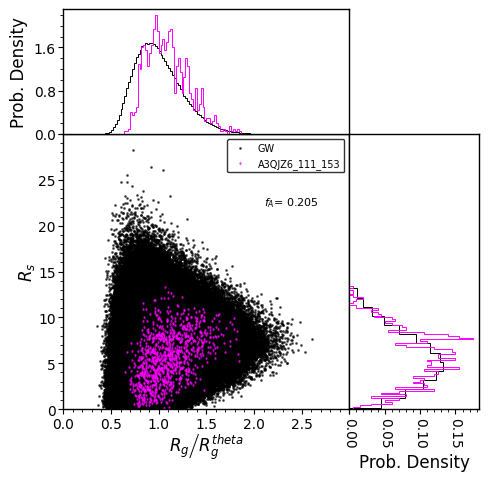

In [23]:
compute_3dplot_from_seq_name('A3QJZ6_111_153')

100.00% of protein/polymer snapshots are close to at least 1 GW snapshot


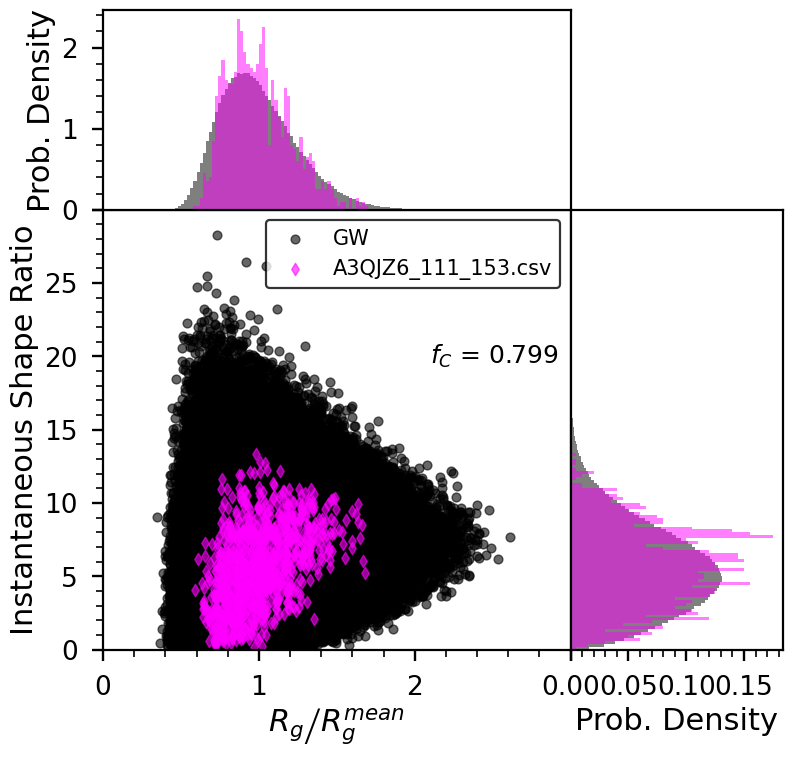

In [27]:
generate_2d_map('A3QJZ6_111_153')

In [116]:
master_df = master_df.reset_index(drop=True).copy()

# use  pyconformap shape vs size

In [25]:
exec(open("pyconformap_modified.py").read())
def generate_2d_map(seq_name):
    location_of_files = seq_name_dir_df[seq_name_dir_df.seq_name==seq_name].seq_dir.values[0]    
    rg2_value = np.load(location_of_files+'/rg.npy')**2
    ree2_value = np.load(location_of_files+'/ete.npy')**2
    pd.DataFrame(zip(rg2_value,ree2_value),columns=['Rg2','Ree2']).to_csv(seq_name+'.csv',index=False)
    map_2d_seq_name = PyConforMap(seq_name+'.csv')
    map_2d_seq_name.plot_protein_against_GW(seq_name+'.csv')
    os.remove(seq_name+'.csv')
    return 

# generate size/shape plots for different nu values (same as above)
## not using pyconformap

nu = 0.065


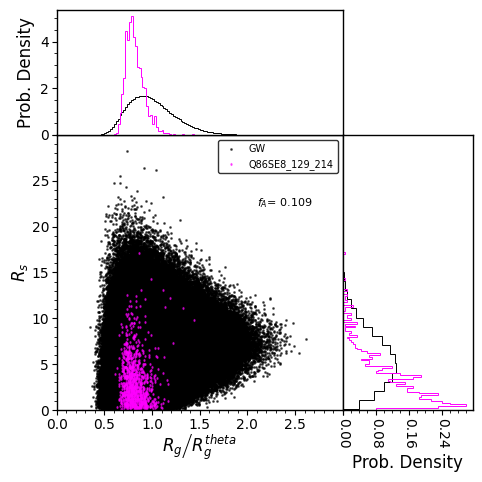

In [28]:
compute_3dplot_from_seq_name('Q86SE8_129_214')
print('nu = 0.065')

nu = 0.086


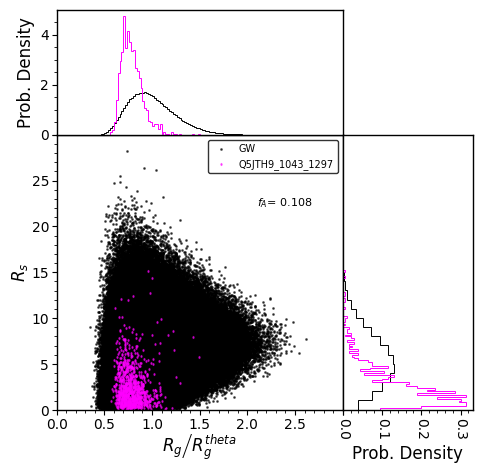

In [29]:
compute_3dplot_from_seq_name('Q5JTH9_1043_1297')
print('nu = 0.086')

nu=0.149


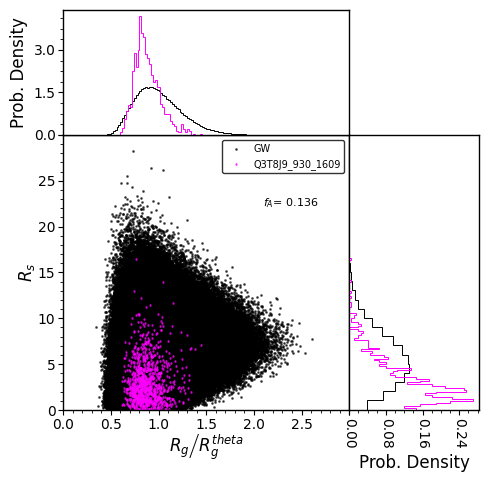

In [30]:
compute_3dplot_from_seq_name('Q3T8J9_930_1609')
print('nu=0.149')

nu = 0.248


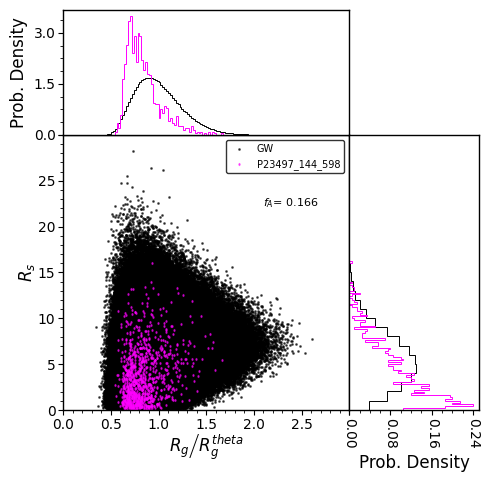

In [31]:
compute_3dplot_from_seq_name('P23497_144_598')
print('nu = 0.248')

nu = 0.308


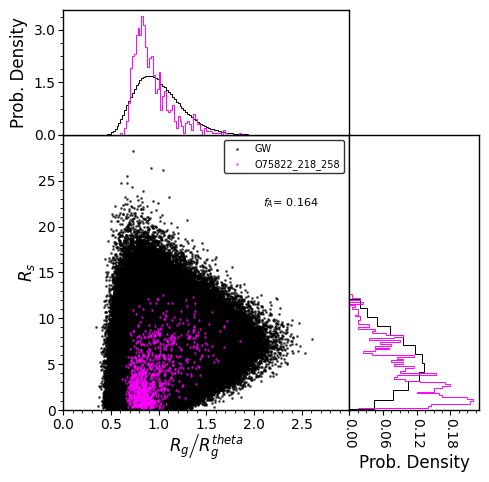

In [32]:
compute_3dplot_from_seq_name('O75822_218_258')
print('nu = 0.308')

nu 0.493


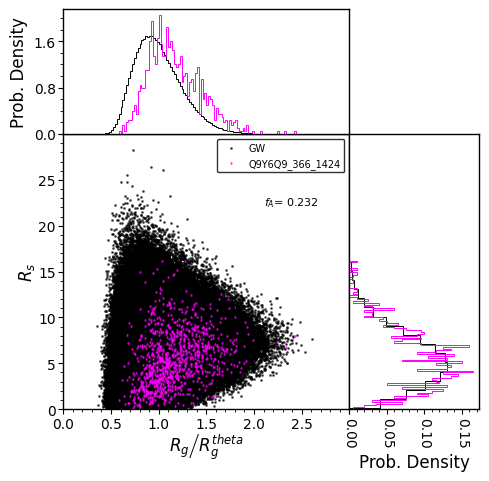

In [33]:
compute_3dplot_from_seq_name('Q9Y6Q9_366_1424')
print('nu 0.493')

nu = 0.558


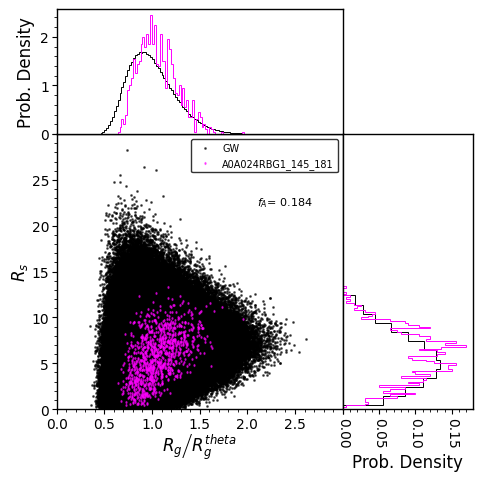

In [34]:
compute_3dplot_from_seq_name('A0A024RBG1_145_181')
print('nu = 0.558')

nu = 0.600


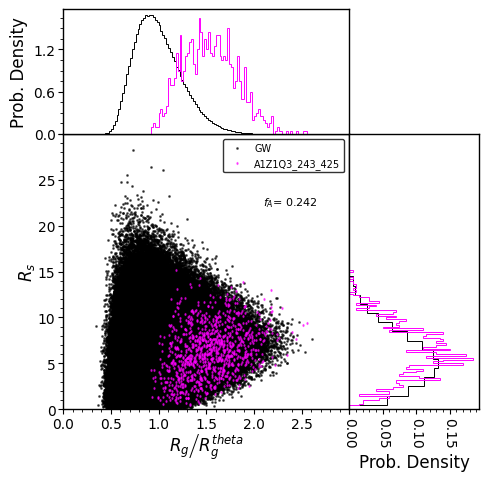

In [35]:
compute_3dplot_from_seq_name('A1Z1Q3_243_425')
print('nu = 0.600')

nu = 0.67


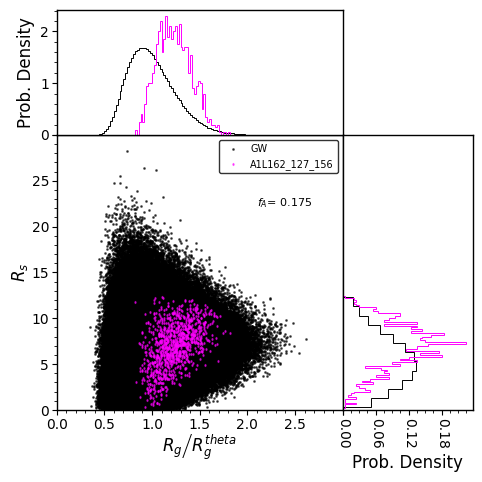

In [36]:
compute_3dplot_from_seq_name('A1L162_127_156')
print('nu = 0.67')

nu = 0.71


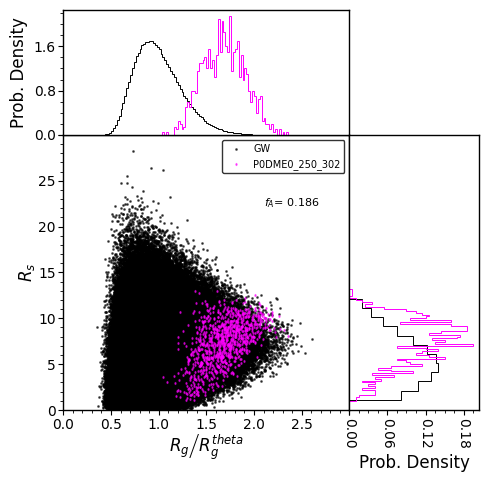

In [37]:
compute_3dplot_from_seq_name('P0DME0_250_302')
print('nu = 0.71')

# Check correlations

In [6]:
seq_name_AFRC

,seq_name,UniProt_ID,N,nu,SPR,ete2_Rg2,S,Delta,Rg/nm,Ree/nm,...,z_omega_+,z_omega_-,z_omega_h,fdomain,nu_svr,SPR_svr,AFRC_mean_rg_theta,rg_rg_theta_mean,mean_inst_ratio,mean_RSA
0,A0A024RBG1_145_181,A0A024RBG1,37,0.558,10.284649,6.304027,0.933961,0.225950,1.606561,3.843011,...,0.000000,0.000000,-0.531910,0.000000,0.565,10.288,15.191941,1.057621,5.808555,0.442952
1,A0A075B6T7_1_32,A0A075B6T7,32,0.525,10.092351,6.114494,0.901807,0.212670,1.448141,3.390487,...,-0.043142,0.000000,0.061436,0.000000,0.532,10.107,14.102458,1.026155,5.598546,0.408551
2,A0A087WTH1_1_67,A0A087WTH1,67,0.532,10.160125,6.069995,0.822738,0.199126,2.243991,5.283533,...,0.384885,2.281943,1.092688,0.298507,0.537,10.167,20.524202,1.094369,5.764964,0.403545
3,A0A087WTH5_1_132,A0A087WTH5,132,0.496,10.049124,6.150972,0.798438,0.188978,3.034005,7.119714,...,0.799692,0.000000,0.627563,0.000000,0.509,10.018,28.732651,1.057445,5.766837,0.365432
4,A0A087WV53_1_46,A0A087WV53,46,0.567,10.212765,6.439589,0.882210,0.214786,1.882622,4.607908,...,1.947253,0.000000,0.090132,0.369565,0.578,10.316,17.085913,1.100872,6.130355,0.438200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28053,Q9Y6Z4_1_181,Q9Y6Z4,181,0.493,10.006512,5.748098,0.799905,0.210890,3.791956,8.607822,...,-1.319891,0.000000,0.163169,0.000000,0.520,9.993,33.590806,1.128366,5.388851,0.391268
28054,Q9Y6Z5_1_254,Q9Y6Z5,254,0.528,9.830710,6.153759,0.896173,0.221422,4.586832,10.808776,...,-2.182869,0.000000,2.214949,0.000000,0.537,9.984,39.658059,1.156510,5.803936,0.394400
28055,Q9Y6Z7_1_109,Q9Y6Z7,109,0.546,10.025622,6.175505,0.935857,0.216970,3.011145,7.113405,...,0.451957,2.132808,1.114749,0.513761,0.513,10.072,25.880343,1.164103,5.738483,0.426205
28056,W6CW81_1_113,W6CW81,113,0.519,10.084249,6.191149,0.843169,0.193880,2.943990,6.975229,...,0.554013,2.234693,-1.942090,0.451327,0.512,10.063,26.561695,1.108354,5.813349,0.400844


In [20]:
seq_name_AFRC.select_dtypes(include='number').corr(method='pearson')[['mean_inst_ratio','ete2_Rg2','mean_RSA']]


,mean_inst_ratio,ete2_Rg2,mean_RSA
N,-0.301564,-0.347066,-0.374355
nu,0.770997,0.808390,0.873747
SPR,0.420789,0.472647,0.678968
ete2_Rg2,0.980125,1.000000,0.567718
S,0.220732,0.291161,0.734985
Delta,0.268018,0.317931,0.687171
Rg/nm,-0.310880,-0.363259,-0.363609
Ree/nm,-0.261774,-0.315605,-0.338933
Rh/nm,-0.324065,-0.377658,-0.398231
fK,0.037050,0.032960,0.055004


In [40]:
df_temp = seq_name_AFRC[['nu','AFRC_mean_rg_theta','mean_inst_ratio','ete2_Rg2']].copy()
df_temp = df_temp.rename(columns= {'AFRC_mean_rg_theta':r'<$R_g\left/R_g^{theta}\right.$>','mean_inst_ratio': r'<$R_{ee}^{2}/R_g^{2}$>',
                        'ete2_Rg2':r'<$R_{ee}^{2}>/<R_g^{2}$>'}).copy()
df_temp.corr(method='pearson')
#x_variable= r'$R_g\left/R_g^{theta}\right.$' 


,nu,<$R_g\left/R_g^{theta}\right.$>,<$R_{ee}^{2}/R_g^{2}$>,<$R_{ee}^{2}>/<R_g^{2}$>
nu,1.000000,-0.490379,0.770997,0.808390
<$R_g\left/R_g^{theta}\right.$>,-0.490379,1.000000,-0.359120,-0.414465
<$R_{ee}^{2}/R_g^{2}$>,0.770997,-0.359120,1.000000,0.980125
<$R_{ee}^{2}>/<R_g^{2}$>,0.808390,-0.414465,0.980125,1.000000


In [15]:
seq_name_AFRC.select_dtypes(include='number').corr(method='pearson')[['nu',
                                                                      'N',
                                                                      'mean_lambda',
                                                                      'AFRC_mean_rg_theta',
                                                                      'mean_inst_ratio',
                                                                      'ete2_Rg2',
                                                                      'mean_RSA']].loc[['nu',
                                                                                        'N',
                                                                                        'mean_lambda',
                                                                                        'AFRC_mean_rg_theta',
                                                                                        'mean_inst_ratio',
                                                                                        'ete2_Rg2',
                                                                                        'mean_RSA']]


,nu,N,mean_lambda,AFRC_mean_rg_theta,mean_inst_ratio,ete2_Rg2,mean_RSA
nu,1.000000,-0.407077,-0.162671,-0.490379,0.770997,0.808390,0.873747
N,-0.407077,1.000000,-0.055294,0.961854,-0.301564,-0.347066,-0.374355
mean_lambda,-0.162671,-0.055294,1.000000,-0.061750,-0.109206,-0.101295,-0.297636
AFRC_mean_rg_theta,-0.490379,0.961854,-0.061750,1.000000,-0.359120,-0.414465,-0.467262
mean_inst_ratio,0.770997,-0.301564,-0.109206,-0.359120,1.000000,0.980125,0.531939
ete2_Rg2,0.808390,-0.347066,-0.101295,-0.414465,0.980125,1.000000,0.567718
mean_RSA,0.873747,-0.374355,-0.297636,-0.467262,0.531939,0.567718,1.000000


Text(0, 0.5, 'SPR')

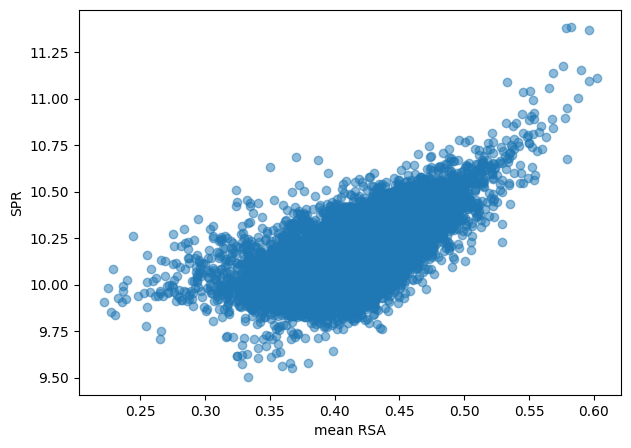

In [21]:

fig,ax = plt.subplots(figsize=(7,5))

ax.scatter(seq_name_AFRC.mean_RSA,seq_name_AFRC['SPR'],alpha=0.5)
ax.set_xlabel('mean RSA')
ax.set_ylabel('SPR')

Text(0, 0.5, 'S')

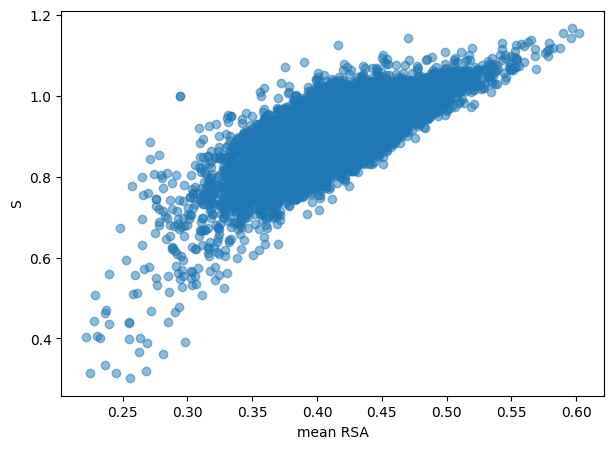

In [22]:

fig,ax = plt.subplots(figsize=(7,5))

ax.scatter(seq_name_AFRC.mean_RSA,seq_name_AFRC['S'],alpha=0.5)
ax.set_xlabel('mean RSA')
ax.set_ylabel('S')

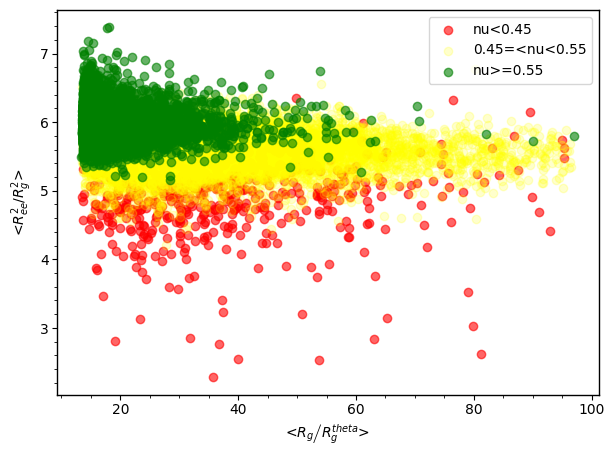

In [54]:

fig,ax = plt.subplots(figsize=(7,5))

temp_set1 =  seq_name_AFRC[seq_name_AFRC.nu<0.45]
temp_set2 =  seq_name_AFRC[(seq_name_AFRC.nu>=0.45) & (seq_name_AFRC.nu<0.55)]
temp_set3 =  seq_name_AFRC[seq_name_AFRC.nu>=0.55]

ax.scatter(temp_set1['AFRC_mean_rg_theta'],
           temp_set1['mean_inst_ratio'],
           alpha=0.6,color='red',label='nu<0.45')

ax.scatter(temp_set2['AFRC_mean_rg_theta'],
           temp_set2['mean_inst_ratio'],
           alpha=0.2,color='yellow',label='0.45=<nu<0.55')        

ax.scatter(temp_set3['AFRC_mean_rg_theta'],
           temp_set3['mean_inst_ratio'],
           alpha=0.6,color='green',label='nu>=0.55')        

ax.set_xlabel(r'<$R_g\left/R_g^{theta}\right.$>')
ax.set_ylabel(r'<$R_{ee}^{2}/R_g^{2}$>')
ax.legend()
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1)

ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=10, width = 0.8, pad = 2)
ax.tick_params(axis='y', which='minor', width = 0.6)
ax.tick_params(axis='x', which='major', labelsize=10, width = 0.8, pad = 2)
ax.tick_params(axis='x', which='minor', width = 0.6)

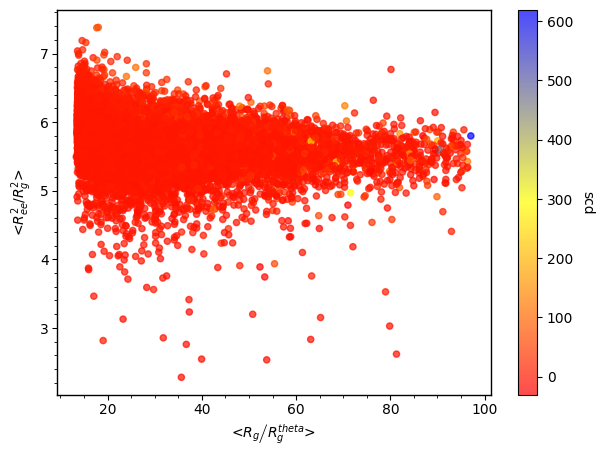

In [100]:

fig,ax = plt.subplots(figsize=(7,5))
palette = matplotlib.colors.LinearSegmentedColormap.from_list("", ['red',"yellow",'blue'])
#palette = plt.get_cmap('rainbow')

sc = ax.scatter(seq_name_AFRC['AFRC_mean_rg_theta'],
           seq_name_AFRC['mean_inst_ratio'],s=20,c=seq_name_AFRC['scd'].values,alpha=0.7,cmap=palette)
               
           
cbar = plt.colorbar(sc)
cbar.set_label('scd',rotation=270,labelpad=15)

ax.set_xlabel(r'<$R_g\left/R_g^{theta}\right.$>')
ax.set_ylabel(r'<$R_{ee}^{2}/R_g^{2}$>')

for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1)

ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=10, width = 0.75, pad = 2)
ax.tick_params(axis='y', which='minor', width = 0.6)
ax.tick_params(axis='x', which='major', labelsize=10, width = 0.8, pad = 2)
ax.tick_params(axis='x', which='minor', width = 0.6)


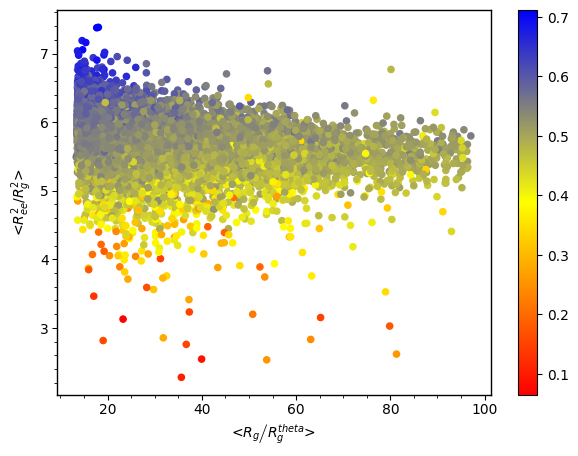

In [88]:

fig,ax = plt.subplots(figsize=(7,5))
palette = matplotlib.colors.LinearSegmentedColormap.from_list("", ['red',"yellow",'blue'])
#palette = plt.get_cmap('viridis')

sc = ax.scatter(seq_name_AFRC['AFRC_mean_rg_theta'],
           seq_name_AFRC['mean_inst_ratio'],s=20,c=seq_name_AFRC['nu'].values,cmap=palette)
               
           
plt.colorbar(sc)

ax.set_xlabel(r'<$R_g\left/R_g^{theta}\right.$>')
ax.set_ylabel(r'<$R_{ee}^{2}/R_g^{2}$>')

for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1)

ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=10, width = 0.75, pad = 2)
ax.tick_params(axis='y', which='minor', width = 0.6)
ax.tick_params(axis='x', which='major', labelsize=10, width = 0.8, pad = 2)
ax.tick_params(axis='x', which='minor', width = 0.6)

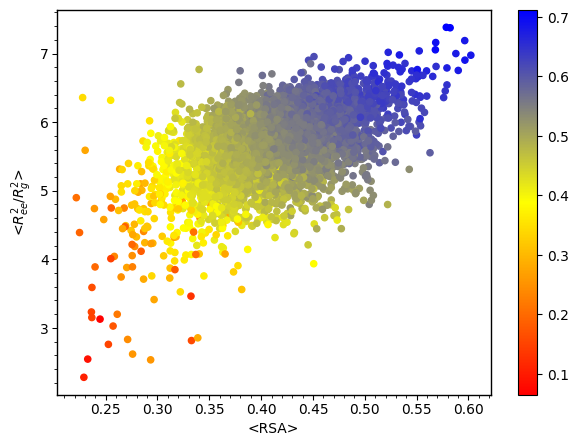

In [87]:

fig,ax = plt.subplots(figsize=(7,5))
palette = matplotlib.colors.LinearSegmentedColormap.from_list("", ['red',"yellow",'blue'])
#palette = plt.get_cmap('rainbow')
sc = ax.scatter(seq_name_AFRC['mean_RSA'],
           seq_name_AFRC['mean_inst_ratio'],s=20,c=seq_name_AFRC['nu'].values,cmap=palette)
               
           
plt.colorbar(sc)

ax.set_xlabel('<RSA>')
ax.set_ylabel(r'<$R_{ee}^{2}/R_g^{2}$>')

for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1)

ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=10, width = 0.75, pad = 2)
ax.tick_params(axis='y', which='minor', width = 0.6)
ax.tick_params(axis='x', which='major', labelsize=10, width = 0.8, pad = 2)
ax.tick_params(axis='x', which='minor', width = 0.6)

In [102]:
seq_name_AFRC[(seq_name_AFRC.mean_RSA<0.25) & (seq_name_AFRC.mean_inst_ratio>6)]

,seq_name,UniProt_ID,N,nu,SPR,ete2_Rg2,S,Delta,Rg/nm,Ree/nm,...,z_omega_+,z_omega_-,z_omega_h,fdomain,nu_svr,SPR_svr,AFRC_mean_rg_theta,rg_rg_theta_mean,mean_inst_ratio,mean_RSA
26931,Q9UPT8_1_401,Q9UPT8,401,0.344,9.850637,6.428349,0.442928,0.116281,3.704316,8.907941,...,5.334649,6.272661,0.0,0.082294,0.378,9.961,49.866,0.743601,6.358032,0.2278


In [ ]:
compute_3dplot_from_seq_name('Q9UPT8_1_401')

Text(0, 0.5, 'mean_inst_ratio')

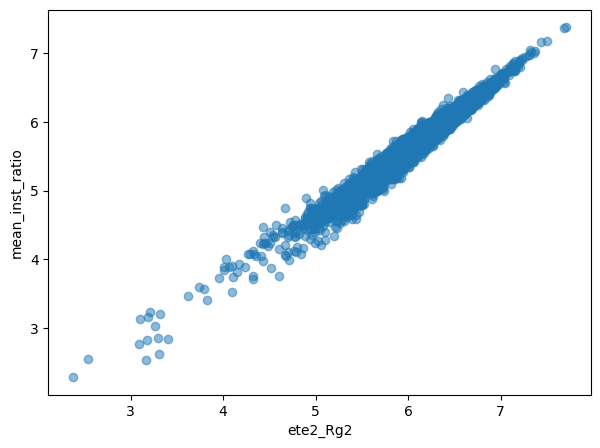

In [18]:

fig,ax = plt.subplots(figsize=(7,5))

ax.scatter(seq_name_AFRC['ete2_Rg2'],seq_name_AFRC['mean_inst_ratio'],alpha=0.5)
ax.set_xlabel('ete2_Rg2')
ax.set_ylabel('mean_inst_ratio')